# Analysis

Template for Jupyter notebooks running Python.

Version 0.1.0 \| First Created July 12, 2023 \| Updated August 01, 2023

## Jupyter Notebook

This is an Jupyter Notebook document. For more details on using a Jupyter Notebook see <https://docs.jupyter.org/en/latest/>.

### Setting up a computational environment. 
Please see proceedure/environment/readme.md for detailed instructions for how to replicate the computational environment used in this study.



# Title of Study

### Authors

- First Name Last Name\*, email address, @githubname, ORCID link, affiliated institution(s)
- First Name Last Name, email address, @githubname, ORCID link, affiliated institution(s)

\* Corresponding author and creator



### Abstract

Write a brief abstract about your research project.

If the project is a reproduction or replication study, include a declaration of the study type with a full reference to the original study.
For example:

This study is a *replication* of:

> citation to prior study

A graphical abstract of the study could also be included as an image here.



### Study metadata

- `Key words`: Comma-separated list of keywords (tags) for searchability. Geographers often use one or two keywords each for: theory, geographic context, and methods.
- `Subject`: select from the [BePress Taxonomy](http://digitalcommons.bepress.com/cgi/viewcontent.cgi?article=1008&context=reference)
- `Date created`: date when project was started
- `Date modified`: date of most recent revision
- `Spatial Coverage`: Specify the geographic extent of your study. This may be a place name and link to a feature in a gazetteer like GeoNames or OpenStreetMap, or a well known text (WKT) representation of a bounding box.
- `Spatial Resolution`: Specify the spatial resolution as a scale factor, description of the level of detail of each unit of observation (including administrative level of administrative areas), and/or or distance of a raster GRID size
- `Spatial Reference System`: Specify the geographic or projected coordinate system for the study, e.g. EPSG:4326
- `Temporal Coverage`: Specify the temporal extent of your study---i.e. the range of time represented by the data observations.
- `Temporal Resolution`: Specify the temporal resolution of your study---i.e. the duration of time for which each observation represents or the revisit period for repeated observations
- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

#### Original study spatio-temporal metadata

- `Spatial Coverage`: extent of original study
- `Spatial Resolution`: resolution of original study
- `Spatial Reference System`: spatial reference system of original study
- `Temporal Coverage`: temporal extent of original study
- `Temporal Resolution`: temporal resolution of original study



## Study design

Describe how the study relates to prior literature, e.g. is it a **original study**, **meta-analysis study**, **reproduction study**, **reanalysis study**, or **replication study**?

Also describe the original study archetype, e.g. is it **observational**, **experimental**, **quasi-experimental**, or **exploratory**?

Enumerate specific **hypotheses** to be tested or **research questions** to be investigated here, and specify the type of method, statistical test or model to be used on the hypothesis or question.


## Proceedure

In [1]:
# Import the necessary packages
import geopandas as gpd
import pandas as pd
import geodatasets as gds
import yaml
import os
import numpy as np
import osmnx as ox
import pyogrio
import networkx as nx
import matplotlib as plt
import folium
import multiprocessing as mp
import time
import itertools

In [2]:
# Write the YAML file with package dependencies
##create if statement set to false so that this wont always run ***!
## code adapted from python land https://python.land/data-processing/python-yaml#What_is_YAML
requirements = """
- openpyxl
- pyyaml
"""
req = yaml.safe_load(requirements)
with open ('req.yaml', 'w') as file:
    yaml.dump(req, file)

print(open('req.yaml').read())

- openpyxl
- pyyaml



In [3]:
# move req file to envs folder 
os.replace("req.yaml", "../environment/req.yaml") 

In [4]:
path = os.path.abspath('req.yaml')
print(path)

C:\Users\gsokolow\Documents\GitHub\Flooding-and-Healthcare-2024\procedure\code\req.yaml


In [2]:
# Import 2018 Census Data for Statistical Area 1s
# Select only the columns we're interested in
sa1 = pd.read_csv("../../data/derived/public/Individual_part1_totalNZ-wide_format_updated_16-7-20_adjusted_labels.csv",
                     usecols = ['Area_code_and_description', #uniqueid for sa1 
                                'Census_2018_usually_resident_population_count', #total pop
                                'Census_2018_Sex_1_Male_CURP', 'Census_2018_Sex_2_Female_CURP', 'Census_2018_Sex_Total_CURP', #sex
                                'Census_2018_median_age_CURP', 'Census_2018_Age_broad_groups_1_Under_15_years_CURP', 'Census_2018_Age_broad_groups_2_15_to_29_years_CURP', 
                                'Census_2018_Age_broad_groups_3_30_to_64_years_CURP', 'Census_2018_Age_broad_groups_4_65_years_and_over_CURP', 
                                'Census_2018_Age_broad_groups_Total_CURP', #age
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_5_Middle_Eastern_Latin_American_African_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_CURP', #ethnicity,
                                'Census_2018_Maori_descent_01_Maori_descent_CURP', 'Census_2018_Maori_descent_02_No_Maori_descent_CURP', 'Census_2018_Maori_descent_04_Dont_know_CURP',
                                'Census_2018_Maori_descent_Total_stated_CURP', 'Census_2018_Maori_descent_99_Not_elsewhere_included_CURP', 'Census_2018_Maori_descent_Total_CURP'
                               ],
                 na_values = 'C') #replaces 'C' for confidential with NaN. 


In [3]:
# Make sure the data loaded in correctly. It did! YAY!
sa1.head()

,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,Census_2018_Sex_2_Female_CURP,Census_2018_Sex_Total_CURP,Census_2018_median_age_CURP,Census_2018_Age_broad_groups_1_Under_15_years_CURP,Census_2018_Age_broad_groups_2_15_to_29_years_CURP,Census_2018_Age_broad_groups_3_30_to_64_years_CURP,Census_2018_Age_broad_groups_4_65_years_and_over_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,SA1 7000000,141,75.0,66.0,141,48.1,24.0,30.0,69.0,21.0,...,0.0,141.0,0.0,141,135.0,6.0,3.0,141.0,0.0,141
1,SA1 7000001,114,60.0,54.0,114,36.5,30.0,21.0,48.0,18.0,...,0.0,114.0,0.0,114,96.0,18.0,0.0,114.0,0.0,114
2,SA1 7000002,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
3,SA1 7000003,225,120.0,105.0,225,30.5,57.0,54.0,75.0,36.0,...,0.0,225.0,0.0,225,210.0,15.0,0.0,225.0,0.0,225
4,SA1 7000004,138,69.0,66.0,138,52.2,24.0,15.0,69.0,30.0,...,0.0,138.0,0.0,138,102.0,30.0,3.0,138.0,0.0,138


In [4]:
## remove the leading SA1 prefix for area codes. This is necessary for the join to work with the geometric data.
sa1["Area_code_and_description"]=sa1.Area_code_and_description.str.replace("SA1 ","", regex = True)

In [5]:
# Import the definitions of the variables we are interested in (created by author based on best available information)
sa1_sel_defs = pd.read_csv("../../data/metadata/2018_Census_Statistical_Area1_Definitions_for_select_variables.csv", index_col = 0, dtype = object)

## Generate metadata
Now, we're going to generate some information about the datasets we're using.

In [9]:
samin = pd.DataFrame(sa1.min(0).rename('minimum'))

In [10]:
samax = pd.DataFrame(sa1.max(0).rename('maximum'))

In [11]:
sa1.isna().sum()

Area_code_and_description                                                                               0
Census_2018_usually_resident_population_count                                                           0
Census_2018_Sex_1_Male_CURP                                                                           575
Census_2018_Sex_2_Female_CURP                                                                         575
Census_2018_Sex_Total_CURP                                                                              0
Census_2018_median_age_CURP                                                                           592
Census_2018_Age_broad_groups_1_Under_15_years_CURP                                                    620
Census_2018_Age_broad_groups_2_15_to_29_years_CURP                                                    620
Census_2018_Age_broad_groups_3_30_to_64_years_CURP                                                    614
Census_2018_Age_broad_groups_4_65_years_and_ov

In [12]:
freqna = ((sa1.isna().sum())/len(sa1)).rename('NaN frequency')

In [13]:
sa1_types = sa1.dtypes.rename('data type')

In [14]:
#let's make a big table to display all the metadata
meta_nums = pd.DataFrame(sa1_types)
meta_nums = meta_nums.join(samin, rsuffix = 'min')
meta_nums = meta_nums.join(samax, rsuffix = 'max')
meta_nums = meta_nums.join(freqna, rsuffix = 'freq NA')
meta_nums = meta_nums.join(sa1_sel_defs)


In [15]:
meta_nums.head()

,data type,minimum,maximum,NaN frequency,definition
Area_code_and_description,object,001 Far North District,Total NZ (Ward),0.000000,unique identifier for statistical area 1
Census_2018_usually_resident_population_count,int64,0,4699755,0.000000,number of usual residents (as opposed to popul...
Census_2018_Sex_1_Male_CURP,float64,0.0,2319558.0,0.017681,number of usual male residents in 2018
Census_2018_Sex_2_Female_CURP,float64,0.0,2380197.0,0.017681,number of usual female residents in 2018
Census_2018_Sex_Total_CURP,int64,0,4699755,0.000000,total number of usual residents for which data...


In [16]:
# Save the Metadata
meta_nums.to_csv('../../data/metadata/2018_Census_Statistical_Area1_Metadata_Derived.csv')

### Calculate percentages
Deviation from analysis plan. For ease of implementation, calculate the population percentages for each of the following variables PRIOR to joining the attribute data with the statistical area 1 geometry.
    - Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP
   - Census_2018_Maori_descent_01_Maori_descent_CURP
   - Census_2018_Maori_descent_02_No_Maori_descent_CURP
   - Census_2018_Maori_descent_04_Dont_know_CURP

In [6]:
sa1_pct = sa1[
["Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP",
    "Census_2018_Maori_descent_01_Maori_descent_CURP",
    "Census_2018_Maori_descent_02_No_Maori_descent_CURP",
    "Census_2018_Maori_descent_04_Dont_know_CURP"]
].div(sa1["Census_2018_usually_resident_population_count"], axis = "rows")

In [7]:
sa1_pct.head()

,Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP,Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP
0,0.063830,0.893617,0.021277,0.0,0.0,0.957447,0.042553,0.021277
1,0.131579,0.815789,0.000000,0.0,0.0,0.842105,0.157895,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.093333,0.920000,0.013333,0.0,0.0,0.933333,0.066667,0.000000
4,0.043478,0.717391,0.021739,0.0,0.0,0.739130,0.217391,0.021739


## Read SA1 geometry data
Since the SA1 data wasn't filtered for only areas in Hawke's Bay prior to downloading it, we need to filter it now. This will make the rest of the code run smoother and faster. To do this, we're going to download and read in the New Zealand district boundaries. 

In [8]:
sa1_geom = gpd.read_file("../../data/raw/public/statistical-area-1-2018-generalised.gpkg")

In [9]:
#districts
districts = gpd.read_file("../../data/raw/public/nz-land-districts.gpkg")

<Axes: >

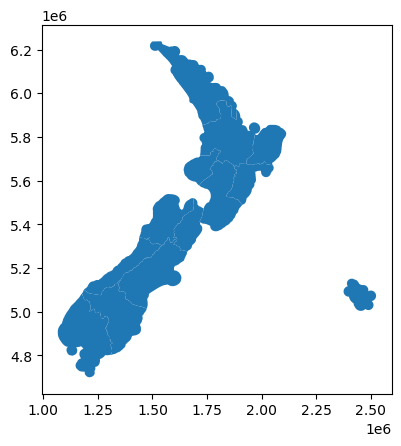

In [10]:
districts.plot()

In [11]:
districts.head() #select only hawkes bay etc and filter

,id,name,geometry
0,1001,North Auckland,"MULTIPOLYGON (((1649501.785 6169888.077, 16491..."
1,1002,South Auckland,"MULTIPOLYGON (((1837764.820 5962615.057, 18377..."
2,1003,Hawkes Bay,"MULTIPOLYGON (((1992477.504 5675492.685, 19924..."
3,1004,Gisborne,"MULTIPOLYGON (((1963177.627 5775296.689, 19631..."
4,1005,Taranaki,"MULTIPOLYGON (((1774732.060 5629052.266, 17748..."


In [12]:
hb = districts[(districts['name'] == "Hawkes Bay")]

<Axes: >

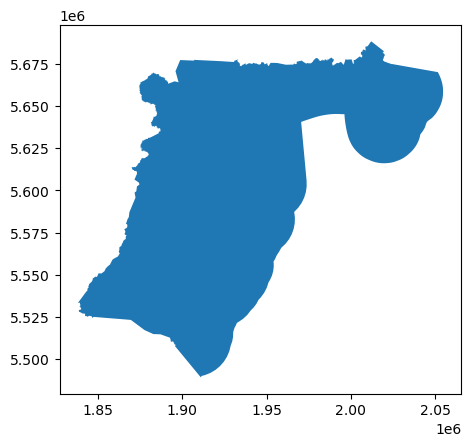

In [13]:
hb.plot()

In [14]:
hb.head()

,id,name,geometry
2,1003,Hawkes Bay,"MULTIPOLYGON (((1992477.504 5675492.685, 19924..."


In [15]:
sa1_geom.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647..."
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648..."
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681..."
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658..."
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848..."


In [16]:
#merge geodataframe with attribute data
sa1_geom_m = pd.merge(sa1_geom, sa1, left_on="SA12018_V1_00", right_on="Area_code_and_description")

In [17]:
sa1_geom_m.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,0.0,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,0.0,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,0.0,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,0.0,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,0.0,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141


<Axes: >

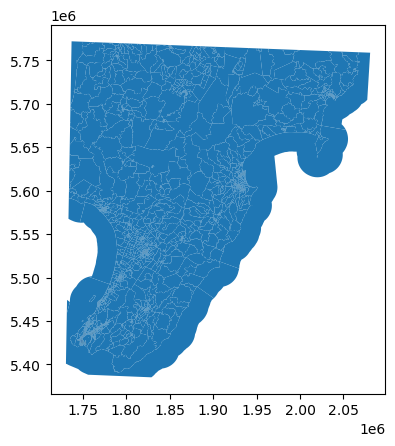

In [18]:
sa1_geom_m.plot()

### IM GOING TO NEED TO COME BACK HERE AND FILTER FOR ONLY HAWKES BAY - MAYBE USING AN OUTLINE?

In [19]:
#save the joined data
sa1_geom_m.to_file("../../data/derived/public/sa1_2018_joined.geojson", driver='GeoJSON')

### Create Centroids
In order to work with the OSMNX graph, the centroid coordinates need to be separared.

In [20]:
sa1_c = sa1_geom_m.centroid

In [21]:
sa1_c.head()

0    POINT (1764608.921 5590887.326)
1    POINT (1765929.419 5585265.571)
2    POINT (1769630.342 5588390.698)
3    POINT (1769580.604 5586518.715)
4    POINT (1881865.661 5590612.464)
dtype: geometry

In [22]:
#sa1_c_m = sa1_geom_m.assign(centroid_x = (sa1_geom_m.centroid.get_coordinates())["x"]).assign(centroid_y = (sa1_geom_m.centroid.get_coordinates())["y"])

In [23]:
sa1_c_m = sa1_geom_m.assign(centroid_geom = (sa1_geom_m.centroid))

We need to drop the SA1 geometry so that the centroids can be the primary geography type for each SA1 area.
Ok, so that didn't work. When we drop the geometry, the dataframe is no longer a geodataframe, so rather than joining the centroid coordinates to the sa1 data, we have to join the sa1 attributes to the centroids. I'm a little worried about the indexes lining up, but i hope it works. Mayeb to be sure, I will
1. generate the centroids
2. conduct a spatial join between the centroids and the sa1 to carry over the correct sa1 id
3. join by attribute

In [24]:
#sa1_c_m = sa1_c_m.drop("geometry", axis = 1)
#instead of dropping the SA1 geometry, we can simply set the new active geometry
sa1_c_m = sa1_c_m.set_geometry("centroid_geom")

<Axes: >

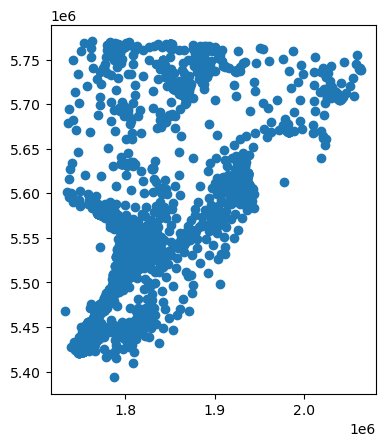

In [25]:
sa1_c.plot()

Now that we have our centroids, we are going to filter them by the boundary of Hawke's Bay. The reason for doing this after the SA1 geometries have been converted to centroids is to reduce the possibility of slightly misaligned edges causing some additional SA1 areas to be taken in, or others left out. We're going to use the clip tool. First, let's make sure our geometries are in the same coordinate reference system.

In [26]:
sa1_c_m.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
hb.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Great! Now we can continue on.

In [28]:
hb_c = gpd.clip(sa1_c_m, hb)

<Axes: >

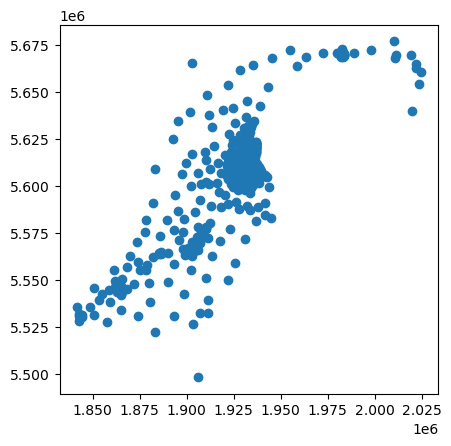

In [29]:
hb_c.plot()

In [30]:
# in theory, this dataframe has both the sa1 id and the centroid
hb_c.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP,centroid_geom
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,174.0,0.0,174,21.0,147.0,6.0,174.0,0.0,174,POINT (1857528.840 5527569.593)
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,153.0,0.0,153,42.0,108.0,3.0,153.0,0.0,153,POINT (1842513.685 5528056.873)
6014,7018883,12,Mainland,233.839368,233.839368,96908.487315,"MULTIPOLYGON (((1887032.879 5532292.214, 18871...",7018883,129,72.0,...,129.0,0.0,129,36.0,87.0,3.0,129.0,0.0,129,POINT (1883289.285 5522048.152)
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,156.0,0.0,156,30.0,123.0,3.0,156.0,0.0,156,POINT (1874214.722 5530549.222)
5922,7016746,12,Mainland,163.760285,163.760285,81967.686143,"MULTIPOLYGON (((1887943.554 5540584.670, 18930...",7016746,99,57.0,...,99.0,0.0,99,15.0,81.0,3.0,99.0,0.0,99,POINT (1893313.568 5530687.696)


### Read in Health Care Provider Data
Note geopandas.points_from_xy function might be useful in streamlining the workflow/making it more transparent (as opposed to using arc)

In [31]:
gps = gpd.read_file("../../data/derived/public/GP_HB_convertedpoints.shp")

In [32]:
gps.head()

,Id,Coordinate,Name,Address,Notes,geometry
0,0,-39.994883 176.549197,Tuki Tuki Medical Center,"1 Cook Street, Waipukurau 4200",None,POINT (1903015.007 5566774.502)
1,0,-39.943788 176.586259,The Doctors Waipawa,"19 Kenilworth Street, Waipawa 4210",None,POINT (1906408.327 5572320.669)
2,0,-39.636864 176.844034,"Totara Health, Hastings","403 Nelson Street N, Hastings 4122",None,POINT (1929903.584 5605480.537)
3,0,-39.622181 176.782606,"Totara Health, Flaxmere","cnr Chatham Road & Caernarvon Drive, Flaxmere ...",None,POINT (1924699.026 5607334.904)
4,0,-39.667184 176.87987,Te Mata Peak Practice,"33-35 Napier Road, Havelock North 4130",None,POINT (1932834.325 5601981.554)


<Axes: >

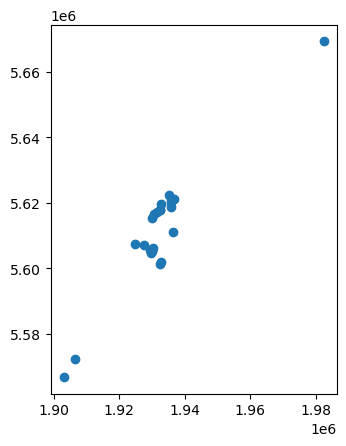

In [33]:
gps.plot()

### Read in LINZ Road Network data

In [45]:
rds = gpd.read_file("../../data/raw/public/nz-road-centrelines-topo-150k.gpkg")

<Axes: >

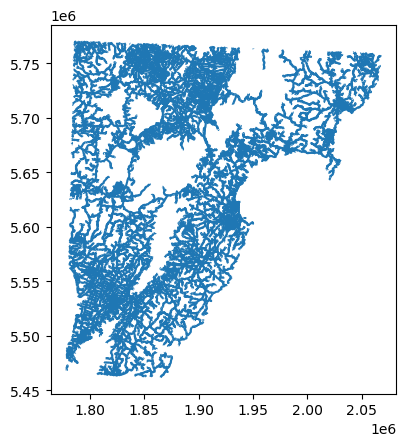

In [46]:
rds.plot()

Next, download the OSM road network data for Hawke's Bay, New Zealand. For the purposes of this analysis, we will focus on the time it takes to drive to a provider, so we will filter out other types of roads.

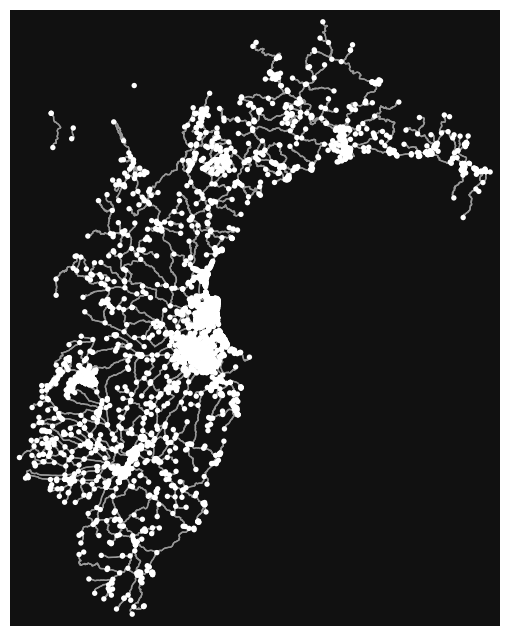

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [34]:
# alternate osm
G = ox.graph_from_place("Hawke's Bay, New Zealand", network_type = "drive", retain_all = "true")
ox.plot_graph(G)

In [35]:
#reproject
G = ox.projection.project_graph(G, "NZGD2000 / New Zealand Transverse Mercator 2000")

Once reprojected, we can save this graph and store it for future use so that we don't have to keep querying from OSM.

In [57]:
ox.io.save_graphml(G, "../../data/raw/public/nz-hb-osm-3-22-24.graphml")

In [58]:
#Read it back in
G = ox.io.load_graphml("../../data/raw/public/nz-hb-osm-3-22-24.graphml")

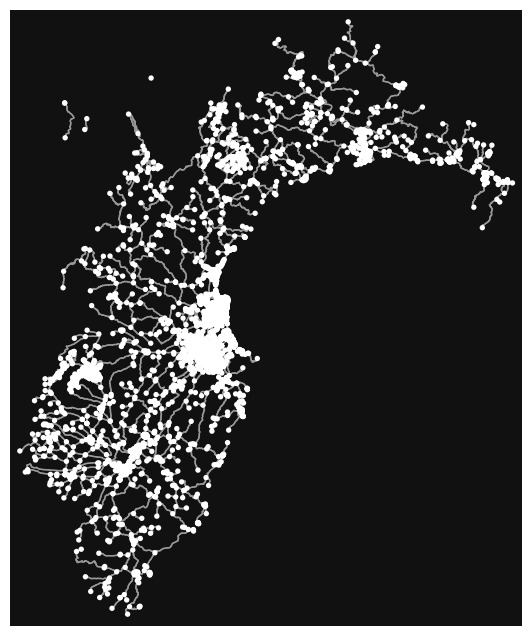

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [59]:
ox.plot_graph(G)

In [36]:
## This code from Joe Holler Replication of Kang
# Turn nodes and edges into geodataframes
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Get unique counts of road segments for each speed limit
print(edges['maxspeed'].value_counts())
print(str(len(edges)) + " edges in graph")
#should be in km per hour
#not sure what it means to have multiple [,]

# can we also visualize highways / roads with higher speed limits to check accuracy?
# the code above converts the graph into an edges geodataframe, which could theoretically be filtered
# by fast road segments and mapped, e.g. in folium

maxspeed
50               9334
100              1216
70                366
80                361
[100, 50]         121
[100, 70]          65
[70, 50]           61
[100, 80]          26
30                 24
[50, 80]           18
[80, 50]           18
[70, 80]           16
60                  6
[60, 80]            4
[100, 70, 50]       4
[100, 60]           4
[60, 50]            4
[50, 20]            4
10                  2
[70, 30]            2
[100, 30]           2
[60, 50, 40]        2
40                  2
[100, 70, 80]       2
[30, 40]            2
[30, 50]            1
[80, 100, 50]       1
20                  1
[50, 60, 80]        1
[80, 60, 50]        1
[40, 20]            1
[20, 40]            1
[30, 80]            1
[80, 30]            1
[50, 30]            1
[50, 100, 80]       1
Name: count, dtype: int64
16197 edges in graph


In [37]:
print(edges['maxspeed'].isna().sum())
#how many null values are there?

4520


There are 55122 total edges in the graph, and 33262 of them have no speed limit attribute. This needs to be addressed in order to estimate travel times to given locations. NOTE FOR FUTURE HONING -> INSERT APPROPRIATE BASE SPEED LIMIT

### NOTES TO RETURN TO FOR HONING THE NETWORK ANALYSIS
1. LINZ or OSM data? [This](https://stackoverflow.com/questions/58257528/osmnx-shortest-path-for-a-set-of-origins-and-destinations) might help with the workflow on LINZ
2. IF LINZ, how to filter?
3. If OSM, is it possible to get historic data? Is it necessary to save a particular date and read that file back in rather than querying each time?
4. What is an appropriate base speed to assign OSM roads that are missing that data?

Let's take a look at the data we've just downloaded.

In [38]:
edges.head()

osmid  \
u          v          key                                                      
357174131  1733626567 0                                             31892922   
           357174213  0                                             31892923   
           1733620211 0    [344165216, 344165217, 370128715, 370128717, 3...   
1733626567 1733626566 0                                             31892922   
           357174131  0                                             31892922   

                                      name    highway  oneway reversed  \
u          v          key                                                
357174131  1733626567 0    Porangahau Road   tertiary   False    False   
           357174213  0    Porangahau Road  secondary   False    False   
           1733620211 0     Wimbledon Road  secondary   False     True   
1733626567 1733626566 0    Porangahau Road   tertiary   False    False   
           357174131  0    Porangahau Road   tertiary   False     True   

                             length  \
u          v          key             
357174131  1733626567 0     168.068   
           357174213  0    4076.653   
           1733620211 0    8476.180   
1733626567 1733626566 0     160.284   
           357174131  0     168.068   

                                                                    geometry  \
u          v          key                                                      
357174131  1733626567 0    LINESTRING (1906438.242 5531725.788, 1906460.3...   
           357174213  0    LINESTRING (1906438.242 5531725.788, 1905730.9...   
           1733620211 0    LINESTRING (1906438.242 5531725.788, 1906435.2...   
1733626567 1733626566 0    LINESTRING (1906569.971 5531817.131, 1906683.2...   
           357174131  0    LINESTRING (1906569.971 5531817.131, 1906498.1...   

                          bridge   lanes maxspeed  ref access junction  
u          v          key                                               
357174131  1733626567 0      NaN     NaN      NaN  NaN    NaN      NaN  
           357174213  0      NaN     NaN      NaN  NaN    NaN      NaN  
           1733620211 0      yes  [1, 2]      NaN  NaN    NaN      NaN  
1733626567 1733626566 0      NaN     NaN      NaN  NaN    NaN      NaN  
           357174131  0      NaN     NaN      NaN  NaN    NaN      NaN

In [39]:
highways = edges[edges["highway"] == "primary"]

In [40]:
highways.head()

osmid              name  highway  oneway  \
u          v           key                                                 
358538844  358538849   0    346658394  State Highway 50  primary   False   
           3531745624  0    346658394  State Highway 50  primary   False   
358538849  11265574602 0    346658394  State Highway 50  primary   False   
           358538844   0    346658394  State Highway 50  primary   False   
3531745624 358538844   0    346658394  State Highway 50  primary   False   

                           reversed    length  \
u          v           key                      
358538844  358538849   0      False   571.937   
           3531745624  0       True  3558.858   
358538849  11265574602 0      False    72.966   
           358538844   0       True   571.937   
3531745624 358538844   0      False  3558.858   

                                                                     geometry  \
u          v           key                                                      
358538844  358538849   0    LINESTRING (1910277.492 5604653.742, 1910296.2...   
           3531745624  0    LINESTRING (1910277.492 5604653.742, 1910250.0...   
358538849  11265574602 0    LINESTRING (1910840.782 5604721.260, 1910911.5...   
           358538844   0    LINESTRING (1910840.782 5604721.260, 1910820.3...   
3531745624 358538844   0    LINESTRING (1906883.805 5604793.668, 1906938.8...   

                           bridge lanes maxspeed    ref access junction  
u          v           key                                               
358538844  358538849   0      NaN   NaN      100  SH 50    NaN      NaN  
           3531745624  0      NaN   NaN      100  SH 50    NaN      NaN  
358538849  11265574602 0      NaN   NaN      100  SH 50    NaN      NaN  
           358538844   0      NaN   NaN      100  SH 50    NaN      NaN  
3531745624 358538844   0      NaN   NaN      100  SH 50    NaN      NaN

In [41]:
highway_50 = highways[highways["name"] == "State Highway 50"]

In [42]:
highway_50.shape

(89, 13)

In [43]:
x = edges[edges["name"] == "Highway 51"]

In [44]:
edges.columns

Index(['osmid', 'name', 'highway', 'oneway', 'reversed', 'length', 'geometry',
       'bridge', 'lanes', 'maxspeed', 'ref', 'access', 'junction'],
      dtype='object')

In [45]:
edges['highway'].value_counts()

highway
residential                      7103
unclassified                     3876
secondary                        2181
tertiary                         1761
trunk                             669
primary                           352
living_street                     105
[residential, unclassified]        34
secondary_link                     34
trunk_link                         30
tertiary_link                      17
primary_link                       13
[residential, living_street]        5
[living_street, tertiary]           4
[unclassified, tertiary]            4
rest_area                           2
[trunk, secondary]                  2
[unclassified, secondary]           2
[secondary, primary]                2
[unclassified, living_street]       1
Name: count, dtype: int64

THIS MAY BE A SPOT TO RETURN TO TO CLEAN SOME STUFF UP

In [46]:
nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
357174131,5.531726e+06,1.906438e+06,3,176.605869,-40.308799,NaN,NaN,POINT (1906438.242 5531725.788)
1733626567,5.531817e+06,1.906570e+06,3,176.607372,-40.307929,NaN,NaN,POINT (1906569.971 5531817.131)
357174213,5.534133e+06,1.903437e+06,3,176.569477,-40.288245,NaN,NaN,POINT (1903436.920 5534133.343)
1733620211,5.525193e+06,1.903137e+06,3,176.570188,-40.368743,NaN,NaN,POINT (1903136.528 5525193.106)
1733659763,5.538237e+06,1.904331e+06,3,176.578027,-40.251022,NaN,NaN,POINT (1904331.010 5538236.965)


In [47]:
nodes.shape

(7063, 8)

In [48]:
edges.shape

(16197, 13)

#### Reproject the nodes and edges to NZGD2000
Attempting to put nodes and centroids in the same projection and concatenating them failed :( 
Next thing to try would be a join by location just to get the attribute of the sa1 key onto the point?

### Read in Disaster Data

In [49]:
disaster = pd.read_csv("../../data/raw/public/TREIS_report_NE_road_closures_2023.csv", dtype = object)

In [60]:
disaster.head(31)

,Official,Planned,Sub Region,Location,Location Description,Status,Location Description.1,Description,Event Comments,Event Type,Closure Start Date,Closure End Date,"Closure Duration (d,h,m)",Closure Duration (hh.mm),System Start Date,System End Date,"Event Duration (d,h,m)",Event Duration (hh.mm),Event ID,Impact Summary
146,Unofficial,Unplanned,Hawkes Bay,01N-0696-W/00.03,Eskdale to Taupo,Resolved,Eskdale to Taupo,Flooding,The road is now clear.,Area Warning,2023-03-26 19:00:00,27-Mar-2023 07:00:00,"12 h, 0 m",12.00,13-Feb-2023 19:27:05,25-Jun-2023 08:27:01,"131 d, 13 h, 0 m",3157.00,415384,"RC, C, RC, C, RC, C, RC, C, RC, C, RC, C, RC, ..."
147,Official,Unplanned,Hawkes Bay,051-0002/00.10-B,Napier to Clive,Resolved,Napier to Clive,Strong Winds,The road is now clear.,Area Warning,2023-02-14 06:39:52,,,,14-Feb-2023 06:36:04,15-Feb-2023 23:49:15,"1 d, 17 h, 13 m",41.13,415561,"C, RC, C,"
148,Unofficial,Unplanned,Hawkes Bay,050-0017/00.27-B,"Fernhill, Ngaruroro Bridge",Resolved,"Fernhill, Ngaruroro Bridge",Flooding,The road is now clear.,Road Hazard,2023-02-15 17:56:52,02-Mar-2023 08:36:29,"14 d, 14 h, 40 m",350.40,14-Feb-2023 08:47:20,02-Mar-2023 08:36:29,"15 d, 23 h, 49 m",383.49,415586,"C, RC, C,"
149,Unofficial,Unplanned,Hawkes Bay,050-0017/10.88-B,Takapau to Hastings,Resolved,Takapau to Hastings,Flooding,The road is now clear.,Area Warning,2023-02-14 09:00:12,,,,14-Feb-2023 09:00:12,26-Jun-2023 15:34:48,"132 d, 6 h, 34 m",3174.34,415597,"RC, C,"
150,Unofficial,Unplanned,Hawkes Bay,050-0017/10.87-B,Takapau to Hastings,Resolved,Takapau to Hastings,Flooding,The road is now clear.,Area Warning,2023-02-14 09:00:12,,,,14-Feb-2023 09:00:12,26-Jun-2023 15:34:48,"132 d, 6 h, 34 m",3174.34,415597,"RC, C,"
151,Unofficial,Unplanned,Hawkes Bay,050-0017/00.09-B,Takapau to Hastings,Resolved,Takapau to Hastings,Flooding,The road is now clear.,Area Warning,2023-02-14 09:00:12,,,,14-Feb-2023 09:00:12,26-Jun-2023 15:34:48,"132 d, 6 h, 34 m",3174.34,415597,"RC, C,"
152,Official,Unplanned,Hawkes Bay,002-0651-W/00.08,"Napier, between Taradale Road and Meeanee Road.",Resolved,"Napier, between Taradale Road and Meeanee Road.",Flooding,The road is now clear.,Area Warning,2023-02-14 13:09:47,16-Feb-2023 20:42:26,"2 d, 7 h, 33 m",55.33,14-Feb-2023 13:09:19,18-Feb-2023 01:17:52,"3 d, 12 h, 8 m",84.08,415653,"C, RC, C,"
153,Official,Unplanned,Hawkes Bay,002-0707/13.08-B,Waipawa to Waipukuarau,Resolved,Waipawa to Waipukuarau,Flooding,The road is now clear.,Area Warning,2023-02-14 14:58:04,,,,14-Feb-2023 14:58:04,16-Feb-2023 00:12:19,"1 d, 9 h, 14 m",33.14,415678,"RC, C,"
154,Official,Unplanned,Hawkes Bay,051-0013/06.07-B,"Mangateretere, between Elwood Road and Napier ...",Resolved,"Mangateretere, between Elwood Road and Napier ...",Flooding,The road is now clear.,Area Warning,2023-02-14 21:35:25,,,,14-Feb-2023 21:20:57,18-Feb-2023 03:16:48,"3 d, 5 h, 56 m",77.56,415717,"C, RC, C,"
155,Unofficial,Unplanned,Hawkes Bay,002-0658/03.43-B,"Pakowhai, Ngaruroro River Bridge",Resolved,"Pakowhai, Ngaruroro River Bridge",Flooding,The road is now clear.,Road Hazard,2023-02-14 23:26:53,18-Feb-2023 01:04:46,"3 d, 1 h, 38 m",73.38,14-Feb-2023 23:20:49,18-Feb-2023 01:04:46,"3 d, 1 h, 44 m",73.44,415724,"C, RC, C,"


In [51]:
# filter for only Hawke's Bay
#*NOTE road closures in other districts could certainly impact folks in hb (edge effects) -> discussion
disaster = disaster[disaster["Sub Region"] == "Hawkes Bay"]
# then filter for time - starting on Feb 13 and extending to May (arbitrary cap, based partially on looking at the data from may/june; it doesn't seem to be cyclone related)
#first need to convert to date/time
disaster["Closure Start Date"] = pd.to_datetime(disaster["Closure Start Date"])
disaster = disaster[disaster["Closure Start Date"] > "2023-02-14"]
disaster = disaster[disaster["Closure Start Date"] < "2023-05-01"]
#filter out crashes
disaster = disaster[disaster["Description"] != "Crash"]
disaster = disaster[disaster["Description"] != "Public Event"]
disaster = disaster[disaster["Description"] != "Breakdown"]
disaster = disaster[str(disaster["Event Duration (hh.mm)"].values) > "240.00"]
# In this study, I'm most interested in long term road closures. The closures listed here range from 1 hr to 152 days.
# Granted, we don't have the *best* idea of how this was all recorded, but let's focus in on closures lasting more than 10 days. 
# Yes, I made that decision having looked at the data. 
# I'm having trouble getting the filter to work right now, so let's just look at the event duration column, which appears to be more complete than the closure column. I assume the difference may be that closure is active road work, and event the entire situation?

KeyError: True

In [52]:
disaster.shape

(23, 20)

In [53]:
disaster.dtypes

Official                            object
Planned                             object
Sub Region                          object
Location                            object
Location Description                object
Status                              object
Location Description.1              object
Description                         object
Event Comments                      object
Event Type                          object
Closure Start Date          datetime64[ns]
Closure End Date                    object
Closure Duration (d,h,m)            object
Closure Duration (hh.mm)            object
System Start Date                   object
System End Date                     object
Event Duration (d,h,m)              object
Event Duration (hh.mm)              object
Event ID                            object
Impact Summary                      object
dtype: object

In [54]:
reference_stations = nodes[nodes["highway"] == "milestone"]

In [55]:
reference_stations.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
982074238,5.620996e+06,1.935016e+06,3,176.895650,-39.495404,milestone,051-0000/2.37-D,POINT (1935015.993 5620995.648)
999012370,5.621022e+06,1.935010e+06,3,176.895572,-39.495174,milestone,051-0002,POINT (1935010.349 5621021.532)
982074232,5.620999e+06,1.934995e+06,3,176.895401,-39.495385,milestone,051-0000/2.41-I,POINT (1934994.664 5620998.663)
1036960848,5.619352e+06,1.933324e+06,3,176.876836,-39.510836,milestone,002-0651,POINT (1933323.659 5619352.235)
1334965413,5.619377e+06,1.933303e+06,3,176.876583,-39.510617,milestone,051-0000,POINT (1933302.954 5619377.422)


In [54]:
reference_stations.shape

(6, 8)

Alright, so that gives us 23 road closures to work with. What we have to do now is not ideal from a reproducability standpoint. The road data we are using is from Open Street Maps. It is comprised of nodes and edges. Edges do have an attribute for street name, which could be matched with the first three digits of the Location code given by Waka Kotahi. This location code matches highway markers which are *theoretically* in OSM, but actually, not so much. Thus, I've asked Waka Kotahi for a georeferenced map of highway markers, but if they can't get that to me, I will have to take the road network we are using, bring it into QGIS, and make edits manually. 

Step 1. Add G_test_3_11.gpkg as a new vector layer; this should load in points and edges into 2 different layers.
Step 2. Now, we could export the highway edges instead, but I'm worried about that causing trouble when we pull it back in as a graph, so I'm going to keep it as a graph and filter again:
Select Features by Value > "highway" is equal to "primary" > copy features, paste features as new layer G_highways.gpkg
Step 3. Add a base map: Layer > Add Layer > Add XYZ Layer > Open Street Map (I already had this connection installed, if you've never done this step, you may need to connect to OSM and or follow along by cross referencing with google maps online).
Step 4. Arrange the layers with the OSM basemap at the bottom, highways on top, and nodes/edges turned off. 
Step 5. For each closure longer than 10 days, identify the road segment using google, then identify the matching segment in QGIS. Select segment; invert selection; copy and paste features into a new temporary scratch layer and proceed with the next edit for the next layer. 
*** DEVIATION ** rather than searching for road type = primary, instead select by name Starts with State Highway. This will scoop up SH2! ACTUALLY, IT DOESN'T HELP TO FILTER BC WE WANT TO THE REST OF THE ROAD NETWORK TO BE INTACT! jUST START W EDGES SET
For highway segments that are closed from town A to town B, I chose to delete the one segment closest to each town, simulating disconnection on either side, but not in the middle.
Closure 157 North of Onepoto Road to Aniwaniwa Falls Hard to locate Onepoto road. Removing a chuck on 38 in the middle, south of Aniwania Falls (segment; u: 4317670854, v: 4317670824)
In Frasertown, closed the segment of sh2 north of the intersecting access road to indicate longer road closure, even though it wasn't the closest to frasertown

DEVIATION:
In exporting G as a geopackage, some edges appear to have been simplified, such that the network is not the same when it is read back in (indeed, it seems to have trouble being recognized as a network at all upon being read back in). So, rather than take the graph out of this script, edit it, and load it back in, I will instead take it out of the script, identify the unique u and v values for the segments I want to delete, and then make those changes to the geodatabase that I've created from the edges of the graph. This should make it easier to transform these edges back into a graph that can be used for network analysis.

Because I had already made an adjusted network layer in QGIS, an easy way to identify the deleted edges is to conduct a difference: 
Input layer: G_test_3_11.gpkg
Overlay layer: flood_scenario_1.gpkg
*note both layers in EPSG 2193
Output save to file: ../../data/derived/public/flood_1_deleted_edges.gpkg
The attribute table for this file has all the information we want! So we will load it in.

NOTE the closure from Eskdale to Taupo on SH1N is excluded because the author was unable to identify the approximate location of road closure.

When I try to use the attribute table imported from QGIS, I run into issues getting osmnx to recognize the edges as edges. I'm going to try a less elegant way to delete the rows directly from the edges dataframe.


In [120]:
#load in deleted road segments
deleted_1 = gpd.read_file("../../data/derived/public/flood_1_deleted_edges.gpkg")

In [191]:
deleted_1.head(10)

,u,v,key,osmid,name,highway,oneway,reversed,length,from,to,bridge,lanes,maxspeed,ref,access,junction,geometry
0,332592856,3542602113,0,"[813281415, 813281416, 85633357, 85633358, 269...","['Main Road', 'State Highway 51']",primary,False,False,521.578,3542602113,332592856,yes,2,50,SH 51,,,"MULTILINESTRING ((1936203.908 5611601.720, 193..."
1,358538871,1252226431,0,227719026,State Highway 50,primary,False,False,1726.542,1252226431,358538871,,2,100,SH 50,,,"MULTILINESTRING ((1914355.758 5604871.523, 191..."
2,358538915,358538920,0,"[1151107193, 190014674, 228337245, 190014662]",State Highway 50,primary,False,True,696.206,358538920,358538915,yes,2,50,SH 50,,,"MULTILINESTRING ((1923017.237 5611703.808, 192..."
3,984997327,5980936286,0,"[1150667778, 1150667779, 189142274, 93552233, ...",Hawke's Bay Expressway,trunk,True,False,5135.521,984997327,5980936286,yes,"['2', '1']",100,SH 2,,,"MULTILINESTRING ((1930405.585 5610030.219, 193..."
4,249682372,1836377040,0,23133879,Lake Road,primary,False,True,4973.579,1836377040,249682372,,,,SH 38,,,"MULTILINESTRING ((1976389.435 5679644.934, 197..."
5,4317670854,4317670824,0,23133879,Lake Road,primary,False,True,5359.388,4317670824,4317670854,,,,SH 38,,,"MULTILINESTRING ((1971583.723 5682018.532, 197..."
6,1621369326,11265608020,0,"[229002065, 31991754, 229002068, 815010575]",State Highway 50,primary,False,False,1396.414,11265608020,1621369326,yes,2,100,SH 50,,,"MULTILINESTRING ((1883705.938 5564660.269, 188..."


In [186]:
#let's make sure we're selecting the rows we want
edges.loc[332592856, 3542602113, 0]

osmid       [813281415, 813281416, 85633357, 85633358, 269...
name                            [Main Road, State Highway 51]
highway                                               primary
oneway                                                  False
reversed                                                 True
length                                                521.578
geometry    LINESTRING (1936356.057432578 5611143.62989984...
bridge                                                    yes
lanes                                                       2
maxspeed                                                   50
ref                                                     SH 51
access                                                    NaN
junction                                                  NaN
Name: (332592856, 3542602113, 0), dtype: object

In [192]:
# delete each row (there's surely a better way to do this) - maybe by pulling out the values from the df and making a dict?
deleted = edges.drop((332592856, 3542602113, 0))
deleted = deleted.drop((358538871,1252226431, 0))
deleted = deleted.drop((358538915, 358538920, 0))
deleted = deleted.drop((984997327, 5980936286, 0))
deleted = deleted.drop((249682372, 1836377040, 0))
deleted = deleted.drop((4317670854, 4317670824, 0))	
deleted = deleted.drop((1621369326,11265608020, 0))

In [189]:
edges.shape

(16197, 13)

In [194]:
deleted.shape
#AWESOME! The numbers line up :)

(16190, 13)

In [195]:
F = ox.graph_from_gdfs(nodes, deleted)
#there's something with th

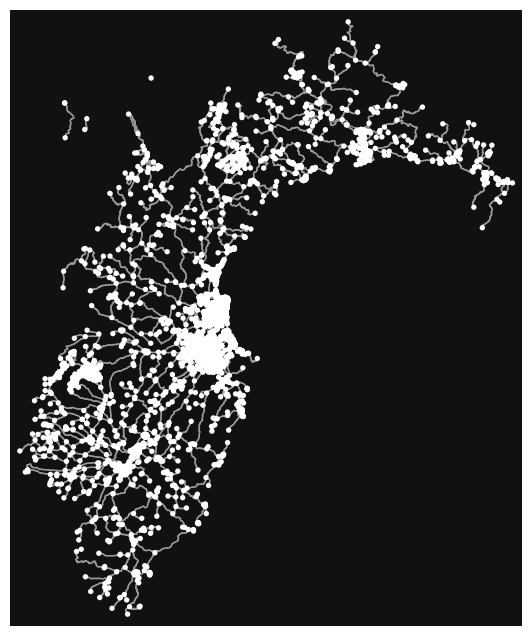

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [196]:
ox.plot_graph(F)

# Conduct Network Analysis
See this helpful [tutorial](https://automating-gis-processes.github.io/2017/lessons/L7/network-analysis.html)!

In order to route between the SA1 centroids (origin points) and the primary care facilities (destination points), we need to find the closest node to each point within the network.
PLACE TO RETURN TO: WHAT IF A PROVIDER IS ON A LONG HIGHWAY AND THE SERVICE ROAD IS NOT INCLUDED? THIS COULD RELOCATE THE GRAPH FAR AWAY. iT MIGHT BE GOOD TO IMPLEMENT AN ALGORITHM TO CHECK HOW FAR EACH NODE IS FROM ITS POINT OF INTEREST

. I deleted the cells above to clean up stuff but essentially I first tried using the nearest_nodes() function and got stuck with the formatting of the input lists (package dependency issue?) so i pivoted to another approach. however, it did work with just one coordinate point. something doesn't seem right here. the nearest node is likely closer than 105 km. Let's try the approached used in this [study](https://github.com/HEGSRR/OR-VT-Pharmacy/blob/main/procedure/code/02_Pharmacy_Accessibility_Analysis.ipynb) * add author title etc

1. find nearest nodes to each centroid -> centroid nodes
2. find nearest nodes to each gp -> gp nodes
3. find nearest gp node to each centroid node
4. solve for the path

In [199]:
c_nearest_nodes = gpd.sjoin_nearest(hb_c, nodes, distance_col = "distances")

In [200]:
c_nearest_nodes.head(10)

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,POINT (1857528.840 5527569.593),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,32151.109031
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,POINT (1842513.685 5528056.873),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,46326.200870
6014,7018883,12,Mainland,233.839368,233.839368,96908.487315,"MULTIPOLYGON (((1887032.879 5532292.214, 18871...",7018883,129,72.0,...,POINT (1883289.285 5522048.152),1744178184,5.526223e+06,1.892114e+06,1,176.440126,-40.363416,NaN,NaN,9762.397251
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,POINT (1874214.722 5530549.222),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,15891.853590
5922,7016746,12,Mainland,163.760285,163.760285,81967.686143,"MULTIPOLYGON (((1887943.554 5540584.670, 18930...",7016746,99,57.0,...,POINT (1893313.568 5530687.696),2427252562,5.531060e+06,1.890380e+06,1,176.417538,-40.320523,NaN,NaN,2957.258795
5839,7022501,23,Oceanic,0.000000,1012.634007,140395.748896,"MULTIPOLYGON (((1929864.609 5510225.492, 19295...",7022501,0,NaN,...,POINT (1906266.579 5498086.142),2427255669,5.518768e+06,1.904233e+06,1,176.586141,-40.426118,NaN,NaN,20781.367965
5847,7016766,12,Mainland,158.847270,158.847270,66411.969122,"MULTIPOLYGON (((1903767.657 5534186.601, 19037...",7016766,117,60.0,...,POINT (1903599.229 5526247.335),1733620211,5.525193e+06,1.903137e+06,3,176.570188,-40.368743,NaN,NaN,1151.299279
1602,7016780,12,Mainland,8.150918,8.150918,17378.696338,"MULTIPOLYGON (((1911914.284 5530360.314, 19119...",7016780,57,24.0,...,POINT (1911137.894 5532281.887),1733654479,5.532139e+06,1.911316e+06,3,176.662960,-40.303281,NaN,NaN,228.682070
5949,7016777,12,Mainland,0.428863,0.428863,3239.571810,"MULTIPOLYGON (((1907287.373 5532691.872, 19072...",7016777,141,72.0,...,POINT (1907192.962 5532380.893),1212933440,5.532351e+06,1.907177e+06,3,176.614250,-40.302904,NaN,NaN,33.473457
5951,7016779,12,Mainland,136.543814,136.543814,83476.122938,"MULTIPOLYGON (((1918179.451 5548229.675, 19182...",7016779,135,66.0,...,POINT (1911360.539 5539392.754),1733659734,5.538944e+06,1.913217e+06,3,176.681958,-40.241387,NaN,NaN,1910.230215


Alright. So, it looks like there are 4 centroids that are very far from the network (we're talking 100+km). This feels unlikely. Upon reflection, it seems that the cause of this may be that the SA1 data was not filtered by region the same way the road network data was. That's something to *go back and fix* on round 2. At the same time, it almost feels suspicious that the other cantroids fall exactly at network nodes... Which is now fixed! But man are some of these points far from the road network. Another thing to return to would be to figure out how to create lines between the centroids and their nearest nodes to better understand the implications of these big distances. Another possible improvement would be to join the centroids to the nearest edge, rather than the nearest point.*we can try that below...*

<Axes: >

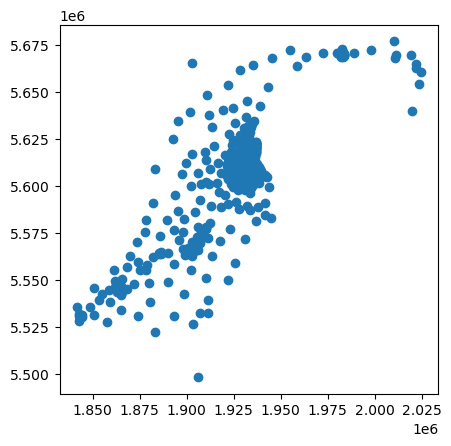

In [201]:
c_nearest_nodes.plot()

Based on the plot, we can see that the SA1 polygon geometry dominates. Perhaps that's what the networks are joining to. Let's remove that column and try again. Aaaand, now we can see it matches the centroid plots! yay!

Now let's repeat that process for the general practitioners.

In [202]:
gp_nearest_nodes = gpd.sjoin_nearest(gps, nodes, distance_col = "distances")

In [203]:
gp_nearest_nodes.head(25)

,Id,Coordinate,Name,Address,Notes,geometry,index_right,y,x,street_count,lon,lat,highway,ref,distances
0,0,-39.994883 176.549197,Tuki Tuki Medical Center,"1 Cook Street, Waipukurau 4200",None,POINT (1903015.007 5566774.502),1621241515,5.566847e+06,1.902998e+06,3,176.548964,-39.994240,NaN,NaN,74.088234
1,0,-39.943788 176.586259,The Doctors Waipawa,"19 Kenilworth Street, Waipawa 4210",None,POINT (1906408.327 5572320.669),1621235360,5.572357e+06,1.906376e+06,3,176.585865,-39.943472,NaN,NaN,48.553769
2,0,-39.636864 176.844034,"Totara Health, Hastings","403 Nelson Street N, Hastings 4122",None,POINT (1929903.584 5605480.537),382802241,5.605477e+06,1.929850e+06,4,176.843411,-39.636916,NaN,NaN,53.842602
3,0,-39.622181 176.782606,"Totara Health, Flaxmere","cnr Chatham Road & Caernarvon Drive, Flaxmere ...",None,POINT (1924699.026 5607334.904),1041877611,5.607336e+06,1.924699e+06,3,176.782608,-39.622171,NaN,NaN,1.174221
4,0,-39.667184 176.87987,Te Mata Peak Practice,"33-35 Napier Road, Havelock North 4130",None,POINT (1932834.325 5601981.554),1213028936,5.601934e+06,1.932826e+06,3,176.879796,-39.667611,NaN,NaN,47.845322
5,0,-39.637561 176.844508,The Hastings Health Centre,"303 St Aubyn Street W, Hastings 4122","also has an Urgent Care Centre, Padiology at H...",POINT (1929940.949 5605401.421),3949444326,5.605354e+06,1.929936e+06,3,176.844476,-39.637988,NaN,NaN,47.539178
6,0,-39.642757 176.842848,The Doctors Hastings,"110 Russell Street S, Hastings 4122",None,POINT (1929773.721 5604830.561),604991296,5.604823e+06,1.929738e+06,4,176.842436,-39.642838,NaN,NaN,36.454671
7,0,-39.635699 176.836987,Medical + Injury Health Centre,"615 Heretaunga Street W, Hastings 4120",None,POINT (1929304.168 5605635.806),986327377,5.605648e+06,1.929262e+06,3,176.836494,-39.635606,NaN,NaN,43.598391
8,0,-39.628692 176.848925,Mahora Medical,"900 Tomoana Road, Mahora, Hastings 4120",None,POINT (1930362.448 5606369.873),1214613415,5.606322e+06,1.930374e+06,3,176.849082,-39.629119,NaN,NaN,49.322380
9,0,-39.671915 176.874949,The Havelock North Health Centre,"26 Middle Road, Havelock North 4130",None,POINT (1932389.294 5601474.562),11254276731,5.601462e+06,1.932406e+06,3,176.875152,-39.672017,NaN,NaN,20.846601


This looks pretty good! Of the 25 GPs, all but 1 are within 100 metres of their nearest node. The one GP that's more than 100 metres away is still less than 0.25 km, and it makes sense that it might be set further back from the road as it is a part of a hospital network.

Now, for each centroid, we want to identify the closest GP. We do NOT want to do the reverse - that would leave many centroids out! 

The question remains... how to do this?
https://www.geeksforgeeks.org/introduction-to-dijkstras-shortest-path-algorithm/
https://www.baeldung.com/cs/shortest-path-to-nodes-graph#:~:text=To%20calculate%20the%20shortest%20paths%2C%20we%20have%20two,don%E2%80%99t%20have%20a%20large%20number%20of%20nodes.%20

Dijkstras algorithm seems promising based on the proportion of edges to nodes^2



Create origin destination matrix with nested loops of network analysis
add an iterative print statement and time check to make sure its working'
potential to use k nearest neighbors to identify likely practices first to reduce algorythmic complexity
maybe map first to see about doing that

for road data, will need to create manually a 'worst case scenario' map and run the network again


In [204]:
gp_nearest_nodes = gpd.sjoin_nearest(gps, nodes, distance_col = "distances")

Let's plot the centroids over the road network.

In [63]:
## save graph as gpkg to then read in to folium map
ox.io.save_graph_shapefile(G, "../../data/derived/public/G_test_3_11.shp")

C:\Users\gsokolow\AppData\Local\Temp\ipykernel_26464\4236447297.py:2: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.io.save_graph_shapefile(G, "../../data/derived/public/G_test_3_11.shp")
C:\Users\gsokolow\.conda\envs\oxnz\Lib\site-packages\osmnx\io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [64]:
G_gpkg = gpd.read_file("../../data/derived/public/G_test_3_11.shp")

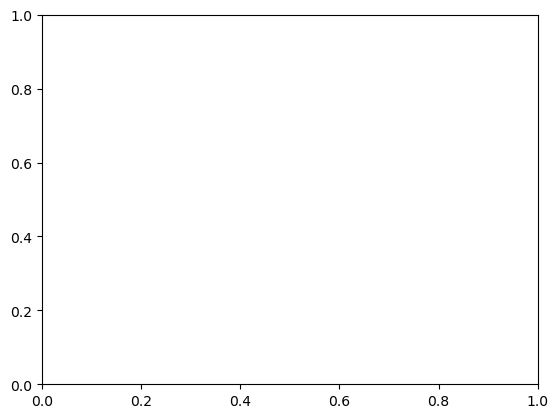

In [65]:
fig, ax = plt.pyplot.subplots()

In [66]:
hb_c.plot(ax=ax, marker='o', color='red', markersize=5)

<Axes: >

<Figure size 640x480 with 0 Axes>

In [67]:
gp_nearest_nodes.plot(ax=ax, marker='o', color='green', markersize=5)

<Axes: >

<Figure size 640x480 with 0 Axes>

In [68]:
G_gpkg.plot(ax=ax, color='blue', edgecolor='black')

<Axes: >

<Figure size 640x480 with 0 Axes>

In [69]:
plt.pyplot.show()

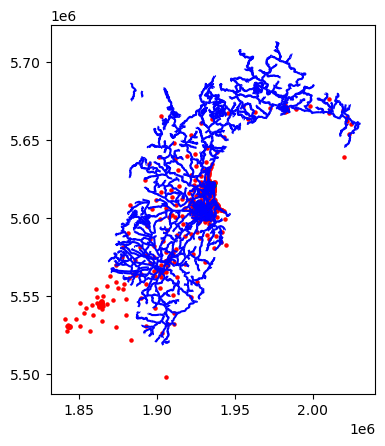

In [70]:
fig

<Axes: >

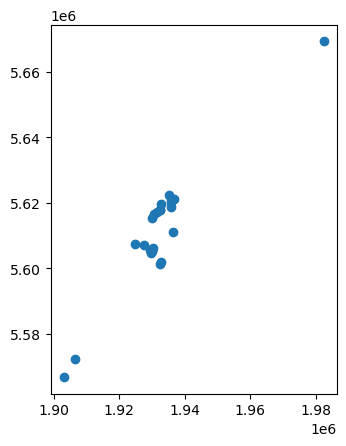

In [71]:
gp_nearest_nodes.plot()

### BETA BABY
The following 2 code blocks show the shape of the SA1 and GP datasets. There are 1098 centroids and 25 providers. Algorithmically, That's complex, so it might be a good idea to filter the data first by distance - giving each centroid fewer possibilities to run through. However, I'm worried about the odd distribution of providers so I will start just with seeing how long it takes to run through all possible options.

In [205]:
c_nearest_nodes.shape

(1098, 45)

In [206]:
gp_nearest_nodes.shape

(25, 15)

In [207]:
gp_nearest_nodes["Name"]

0             Tuki Tuki Medical Center
1                  The Doctors Waipawa
2              Totara Health, Hastings
3              Totara Health, Flaxmere
4                Te Mata Peak Practice
5           The Hastings Health Centre
6                 The Doctors Hastings
7       Medical + Injury Health Centre
8                       Mahora Medical
9     The Havelock North Health Centre
10           Te Taiwhenua O Heretaunga
11                Clive Medical Centre
12                 The Doctors Ahuriri
13                  The Doctors Napier
14            The Doctors Greenmeadows
15                     The Doctors EIT
16             Taradale Medical Centre
17              Tamatea Medical Centre
18                    Eastcott Medical
19             Manaenui Medical Centre
20         Hawke's Bay Wellness Centre
21      Greendale Family Health Centre
22              Central Medical Napier
23              Carlyle Medical Centre
24               Queen Street Practice
Name: Name, dtype: object

In [208]:
c_nearest_nodes[(c_nearest_nodes['index_right'] == 1744163175)]

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,POINT (1857528.840 5527569.593),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,32151.109031
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,POINT (1842513.685 5528056.873),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,46326.200870
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,POINT (1874214.722 5530549.222),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,15891.853590
6002,7018807,12,Mainland,136.435044,136.435044,71941.764055,"MULTIPOLYGON (((1864455.792 5541077.671, 18644...",7018807,168,90.0,...,POINT (1865294.668 5534075.572),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,22766.890323
5858,7018810,12,Mainland,169.576514,169.576514,105423.923655,"MULTIPOLYGON (((1880936.868 5545155.708, 18809...",7018810,183,96.0,...,POINT (1880444.822 5538110.918),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,7105.509683
6027,7018843,12,Mainland,7.607400,7.607400,21706.018954,"MULTIPOLYGON (((1862986.702 5542787.628, 18630...",7018843,162,78.0,...,POINT (1865221.979 5541814.916),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,22352.435349
5874,7018863,12,Mainland,68.033382,68.033382,45555.918794,"MULTIPOLYGON (((1853188.880 5536617.476, 18532...",7018863,126,66.0,...,POINT (1850712.060 5531065.173),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,37652.731440
5860,7018815,12,Mainland,30.055011,30.055011,41944.136595,"MULTIPOLYGON (((1862317.108 5542656.810, 18628...",7018815,183,96.0,...,POINT (1859133.223 5538281.958),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,28326.744322


In [209]:
c_nearest_nodes.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,POINT (1857528.840 5527569.593),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,32151.109031
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,POINT (1842513.685 5528056.873),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,46326.200870
6014,7018883,12,Mainland,233.839368,233.839368,96908.487315,"MULTIPOLYGON (((1887032.879 5532292.214, 18871...",7018883,129,72.0,...,POINT (1883289.285 5522048.152),1744178184,5.526223e+06,1.892114e+06,1,176.440126,-40.363416,NaN,NaN,9762.397251
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,POINT (1874214.722 5530549.222),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,15891.853590
5922,7016746,12,Mainland,163.760285,163.760285,81967.686143,"MULTIPOLYGON (((1887943.554 5540584.670, 18930...",7016746,99,57.0,...,POINT (1893313.568 5530687.696),2427252562,5.531060e+06,1.890380e+06,1,176.417538,-40.320523,NaN,NaN,2957.258795


The first network analysis took 40-60 minutes to run. To make it quicker, we're going to implement parallel processing: essentially dividing the 1098 centroids (origins) into smaller groups that can be handled by different computer processes at the same time.

In [ ]:
# Let's test with one first. I've selected arbitrarily the centroid with node id 1744163175.
def o_d_matrix(dest_gdb, G):
    o_d_matrix = gpd.GeoDataFrame()

    tmp_list = []
    for gp in gp_nearest_nodes["index_right"]:
        r = ox.routing.shortest_path(G, 1744163175, gp)
        subg = G.subgraph(nodes = r)
        d = ox.stats.edge_length_total(subg)
        tmp_list.append({
            'origin_n' : 1744163175, 
            'dest_index' : gp,
            'route': r,
            'distance' : d
                                              })
        print(gp)
    short_matrix = gpd.GeoDataFrame(tmp_list)
    shortest = short_matrix[["distance"]].min().iloc[0]
    row = short_matrix[(short_matrix['distance'] == shortest)]

    o_d_matrix = pd.concat([o_d_matrix, row])

    return o_d_matrix


        
        


In [105]:
c_nearest_nodes.at[6054, [1]]

TypeError: unhashable type: 'list'

In [123]:
c_nearest_nodes.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,POINT (1857528.840 5527569.593),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,32151.109031
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,POINT (1842513.685 5528056.873),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,46326.200870
6014,7018883,12,Mainland,233.839368,233.839368,96908.487315,"MULTIPOLYGON (((1887032.879 5532292.214, 18871...",7018883,129,72.0,...,POINT (1883289.285 5522048.152),1744178184,5.526223e+06,1.892114e+06,1,176.440126,-40.363416,NaN,NaN,9762.397251
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,POINT (1874214.722 5530549.222),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,15891.853590
5922,7016746,12,Mainland,163.760285,163.760285,81967.686143,"MULTIPOLYGON (((1887943.554 5540584.670, 18930...",7016746,99,57.0,...,POINT (1893313.568 5530687.696),2427252562,5.531060e+06,1.890380e+06,1,176.417538,-40.320523,NaN,NaN,2957.258795


In [126]:
c_nearest_nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1098 entries, 6054 to 1388
Data columns (total 45 columns):
 #   Column                                                                                              Non-Null Count  Dtype   
---  ------                                                                                              --------------  -----   
 0   SA12018_V1_00                                                                                       1098 non-null   object  
 1   LANDWATER                                                                                           1098 non-null   object  
 2   LANDWATER_NAME                                                                                      1098 non-null   object  
 3   LAND_AREA_SQ_KM                                                                                     1098 non-null   float64 
 4   AREA_SQ_KM                                                                                          10

In [129]:
gp_nearest_nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Id            25 non-null     int64   
 1   Coordinate    25 non-null     object  
 2   Name          25 non-null     object  
 3   Address       25 non-null     object  
 4   Notes         2 non-null      object  
 5   geometry      25 non-null     geometry
 6   index_right   25 non-null     int64   
 7   y             25 non-null     float64 
 8   x             25 non-null     float64 
 9   street_count  25 non-null     int64   
 10  lon           25 non-null     float64 
 11  lat           25 non-null     float64 
 12  highway       1 non-null      object  
 13  ref           0 non-null      object  
 14  distances     25 non-null     float64 
dtypes: float64(5), geometry(1), int64(3), object(6)
memory usage: 3.1+ KB


In [210]:
#now lets expand the test
# changed from iterating over the lists of just the nearest points to iterating over the whole dataframe to 
# be able to carry over more data and better understand where duplicates may be coming from
def o_d_matrix(origin_gdb, dest_gdb, G):
    o_d_matrix = gpd.GeoDataFrame()

    for c in origin_gdb.itertuples():
        tmp_list = []
        for gp in dest_gdb.itertuples():
            r = ox.routing.shortest_path(G, c[37], gp[7])
            subg = G.subgraph(nodes = r)
            d = ox.stats.edge_length_total(subg)
            tmp_list.append({
                'origin_n' : c[37], 
                'area_code': c[8],
                'dest_index' : gp[7],
                'dest_name': gp[3],
                'route': r,
                'distance' : d
                                                  })
            #print("gp"+ str(tmp_list))
        short_matrix = gpd.GeoDataFrame(tmp_list)
        shortest = short_matrix[["distance"]].min().iloc[0]
        row = short_matrix[(short_matrix['distance'] == shortest)]
    
        o_d_matrix = pd.concat([o_d_matrix, row])
        print("c"+str(c[37]))

    return o_d_matrix


        
        


In [131]:
new_beta_test = o_d_matrix(c_nearest_nodes.iloc[1:10], gp_nearest_nodes, G)

cPandas(Index=6047, SA12018_V1_00='7018860', LANDWATER='12', LANDWATER_NAME='Mainland', LAND_AREA_SQ_KM=24.40219053, AREA_SQ_KM=24.40219053, Shape_Length=25668.7322169, geometry=<MULTIPOLYGON (((1843466.302 5530038.873, 1843795.164 5529932.622, 1843993.2...>, Area_code_and_description='7018860', Census_2018_usually_resident_population_count=153, Census_2018_Sex_1_Male_CURP=72.0, Census_2018_Sex_2_Female_CURP=78.0, Census_2018_Sex_Total_CURP=153, Census_2018_median_age_CURP=39.5, Census_2018_Age_broad_groups_1_Under_15_years_CURP=33.0, Census_2018_Age_broad_groups_2_15_to_29_years_CURP=27.0, Census_2018_Age_broad_groups_3_30_to_64_years_CURP=81.0, Census_2018_Age_broad_groups_4_65_years_and_over_CURP=12.0, Census_2018_Age_broad_groups_Total_CURP=153, Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP=135.0, Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP=27.0, Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP=9.0, Census_2

In [133]:
new_beta_test.head()

,origin_n,area_code,dest_index,dest_name,route,distance
0,1744163175,7018860,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,1744178184,7018883,1621241515,Tuki Tuki Medical Center,"[1744178184, 4032267776, 1744178056, 174417761...",114865.822
0,1744163175,7018808,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,2427252562,7016746,1621241515,Tuki Tuki Medical Center,"[2427252562, 1744177611, 4032262882, 357174213...",112164.446
0,2427255669,7022501,1621241515,Tuki Tuki Medical Center,"[2427255669, 1733625528, 1733625256, 173362657...",120587.466


In [88]:
# modifying function from Joseph Holler's replication study of Kang et al (https://github.com/HEGSRR/RPr-Kang-2020/blob/main/procedure/code/03-COVID-19Acc-Reanalysis.ipynb)
#this is just really not working :(
def matrix_unpacker(args):
    return o_d_matrix(*args)

# WHERE THE RESULTS ARE POOLED AND THEN REAGGREGATED
def measure_acc_par (origins, destinations, network, num_proc = 8):
    nearest = []
    for o in origins["index_right"]:
        nearest.append(gpd.GeoDataFrame())
    pool = mp.Pool(processes = num_proc)
    origin_list = [origins.iloc[i] for i in range(len(origins)) ]
    print("Calculating", len(origin_list), "origin points...\ncompleted number:", end=" ")
    results = pool.map(matrix_unpacker, zip(range(len(origin_list)), origins, itertools.repeat(destinations), network))
    pool.close()
    pool.join()
    #results.sort()
    return results


        
        


In [147]:
for h in c_nearest_nodes:
    print(h)

SA12018_V1_00
LANDWATER
LANDWATER_NAME
LAND_AREA_SQ_KM
AREA_SQ_KM
Shape_Length
geometry
Area_code_and_description
Census_2018_usually_resident_population_count
Census_2018_Sex_1_Male_CURP
Census_2018_Sex_2_Female_CURP
Census_2018_Sex_Total_CURP
Census_2018_median_age_CURP
Census_2018_Age_broad_groups_1_Under_15_years_CURP
Census_2018_Age_broad_groups_2_15_to_29_years_CURP
Census_2018_Age_broad_groups_3_30_to_64_years_CURP
Census_2018_Age_broad_groups_4_65_years_and_over_CURP
Census_2018_Age_broad_groups_Total_CURP
Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP
Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP
Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP
Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP
Census_2018_Ethnicity_grouped_total_responses_level_1_5_Middle_Eastern_Latin_American_African_CURP
Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP
Census_2018_Ethnicity_g

In [66]:
def matrix_unpacker(args):
    return o_d_matrix(*args)

In [ ]:
#another attempt
    
if __name__ == '__main__':
    # create an iterable of the centroids to be traversed
    o_nodes = []
    for o in c_nearest_nodes.itertuples():
        o_nodes.append({
            'origin_n' : o[37], 
            'area_code': o[8],
        })
    print(f'Loaded {len(o_nodes)} cs from c_nearest_nodes')
    # create the process pool
    with mp.Pool(10) as pool:
        # prepare arguments as tuples?
        #args = [c_nearest_nodes.iloc[1:10], gp_nearest_nodes, G] 
        for result in pool.map(matrix_unpacker, zip(c_nearest_nodes.iloc[1:10], itertools.repeat(gp_nearest_nodes), itertools.repeat(G))):
            print(f'Got result: {result}', flush=True)



Loaded 1098 cs from c_nearest_nodes


In [64]:
test_args = [c_nearest_nodes.iloc[1:10], gp_nearest_nodes, G]

In [67]:
matrix_unpacker(test_args)

c1744163175
c1744178184
c1744163175
c2427252562
c2427255669
c1733620211
c1733654479
c1212933440
c1733659734


,origin_n,area_code,dest_index,dest_name,route,distance
0,1744163175,7018860,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,1744178184,7018883,1621241515,Tuki Tuki Medical Center,"[1744178184, 4032267776, 1744178056, 174417761...",114865.822
0,1744163175,7018808,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,2427252562,7016746,1621241515,Tuki Tuki Medical Center,"[2427252562, 1744177611, 4032262882, 357174213...",112164.446
0,2427255669,7022501,1621241515,Tuki Tuki Medical Center,"[2427255669, 1733625528, 1733625256, 173362657...",120587.466
0,1733620211,7016766,1621241515,Tuki Tuki Medical Center,"[1733620211, 357174131, 1733626567, 1733626566...",103558.964
0,1733654479,7016780,1621241515,Tuki Tuki Medical Center,"[1733654479, 1212933031, 1212948896, 754085362...",95200.518
0,1212933440,7016777,1621241515,Tuki Tuki Medical Center,"[1212933440, 1212932545, 1212987566, 121293273...",85163.042
0,1733659734,7016779,1621241515,Tuki Tuki Medical Center,"[1733659734, 1212932234, 3565298708, 173371235...",78232.838


In [141]:
c_nearest_nodes[37]

KeyError: 37

In [ ]:
%%time
nearest_providers = measure_acc_par(c_nearest_nodes, gp_nearest_nodes, G)

Calculating 1098 origin points...
completed number: 

In [ ]:
outputs.head()

In [101]:
c_nearest_nodes.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,POINT (1857528.840 5527569.593),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,32151.109031
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,POINT (1842513.685 5528056.873),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,46326.200870
6014,7018883,12,Mainland,233.839368,233.839368,96908.487315,"MULTIPOLYGON (((1887032.879 5532292.214, 18871...",7018883,129,72.0,...,POINT (1883289.285 5522048.152),1744178184,5.526223e+06,1.892114e+06,1,176.440126,-40.363416,NaN,NaN,9762.397251
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,POINT (1874214.722 5530549.222),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,15891.853590
5922,7016746,12,Mainland,163.760285,163.760285,81967.686143,"MULTIPOLYGON (((1887943.554 5540584.670, 18930...",7016746,99,57.0,...,POINT (1893313.568 5530687.696),2427252562,5.531060e+06,1.890380e+06,1,176.417538,-40.320523,NaN,NaN,2957.258795


In [103]:
c1_test = o_d_matrix(c_nearest_nodes, gp_nearest_nodes, G)

KeyError: Pandas(Index=6054, SA12018_V1_00='7018877', LANDWATER='12', LANDWATER_NAME='Mainland', LAND_AREA_SQ_KM=94.81477972, AREA_SQ_KM=94.81477972, Shape_Length=54563.2981738, geometry=<MULTIPOLYGON (((1858375.46 5532286.162, 1858521.609 5532255.442, 1858672.66...>, Area_code_and_description='7018877', Census_2018_usually_resident_population_count=174, Census_2018_Sex_1_Male_CURP=90.0, Census_2018_Sex_2_Female_CURP=84.0, Census_2018_Sex_Total_CURP=174, Census_2018_median_age_CURP=34.6, Census_2018_Age_broad_groups_1_Under_15_years_CURP=48.0, Census_2018_Age_broad_groups_2_15_to_29_years_CURP=36.0, Census_2018_Age_broad_groups_3_30_to_64_years_CURP=78.0, Census_2018_Age_broad_groups_4_65_years_and_over_CURP=12.0, Census_2018_Age_broad_groups_Total_CURP=174, Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP=147.0, Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP=18.0, Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP=0.0, Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP=9.0, Census_2018_Ethnicity_grouped_total_responses_level_1_5_Middle_Eastern_Latin_American_African_CURP=0.0, Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP=6.0, Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP=6.0, Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP=0.0, Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP=174.0, Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP=0.0, Census_2018_Ethnicity_grouped_total_responses_Total_CURP=174, Census_2018_Maori_descent_01_Maori_descent_CURP=21.0, Census_2018_Maori_descent_02_No_Maori_descent_CURP=147.0, Census_2018_Maori_descent_04_Dont_know_CURP=6.0, Census_2018_Maori_descent_Total_stated_CURP=174.0, Census_2018_Maori_descent_99_Not_elsewhere_included_CURP=0.0, Census_2018_Maori_descent_Total_CURP=174, centroid_geom=<POINT (1857528.84 5527569.593)>, index_right=1744163175, y=5539361.678822122, x=1887439.3821118928, street_count=3, lon=176.3792648, lat=-40.2468735, highway=nan, ref=nan, distances=32151.109030537606)

In [211]:
#now let's run the network analysis again, but using the netowrk with road closures
flood_scenario =  o_d_matrix(c_nearest_nodes, gp_nearest_nodes, F)

c1744163175
c1744163175
c1744178184
c1744163175
c2427252562
c2427255669
c1733620211
c1733654479
c1212933440
c1733659734
c7825816188
c1733711686
c7825549831
c7562791132
c1212987591
c1744163175
c1744163175
c1744163175
c1733712383
c1745372422
c1745372658
c1745332974
c1745332974
c1745372658
c1745374291
c1745373511
c1745332974
c1745320672
c1745372422
c357192017
c1745332974
c1745320672
c1745423833
c1745372422
c1520854230
c1212933277
c1745332974
c1745423254
c7591934423
c1520854129
c1745423200
c1520854056
c1520854054
c1621301180
c1212924533
c1212987583
c1212987595
c1212924441
c1621241672
c1212924572
c1621241676
c1621241636
c1621241626
c7591838254
c1621241609
c1621241607
c1621241602
c1994928792
c1618539142
c1618539140
c331585218
c1618539086
c1621339840
c3225769630
c606335376
c1212924569
c1212924505
c4376588040
c1621241590
c1621241590
c1621339889
c2079603015
c1618539050
c615179592
c5152922723
c1621235384
c1621235383
c1212959996
c606335205
c1621235312
c606335370
c606335388
c3084422759
c1621235300

In [212]:
flood_scenario.head()

,origin_n,area_code,dest_index,dest_name,route,distance
0,1744163175,7018877,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,1744163175,7018860,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,1744178184,7018883,1621241515,Tuki Tuki Medical Center,"[1744178184, 4032267776, 1744178056, 174417761...",114865.822
0,1744163175,7018808,1621241515,Tuki Tuki Medical Center,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
0,2427252562,7016746,1621241515,Tuki Tuki Medical Center,"[2427252562, 1744177611, 4032262882, 357174213...",112164.446


In [213]:
flood_scenario.to_csv("../../data/derived/public/nearest_provider_post_flod.csv")

In [214]:
flood_scenario_read = pd.read_csv("../../data/derived/public/nearest_provider_post_flod.csv")

In [ ]:
flood_scenatio_read.head()

In [ ]:
c1_test.head(50)

In [ ]:
c1_test.tail(50)

In [ ]:
#the first round of processing (before parallel processing instituted) took about 40mins.
#let's save these preliminary results to avoid running that again. yuck!
c1_test.to_csv("../../data/derived/public/nearest_provider_pre_flod.csv")



In [80]:
c1_test_read = pd.read_csv("../../data/derived/public/nearest_provider_pre_flod.csv")

In [81]:
c1_test_read.shape

(1146, 5)

In [82]:
c_nearest_nodes.shape

(1098, 45)

In [87]:
c_nearest_nodes.head(10)

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
6054,7018877,12,Mainland,94.814780,94.814780,54563.298174,"MULTIPOLYGON (((1858375.460 5532286.162, 18585...",7018877,174,90.0,...,POINT (1857528.840 5527569.593),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,32151.109031
6047,7018860,12,Mainland,24.402191,24.402191,25668.732217,"MULTIPOLYGON (((1843466.302 5530038.873, 18437...",7018860,153,72.0,...,POINT (1842513.685 5528056.873),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,46326.200870
6014,7018883,12,Mainland,233.839368,233.839368,96908.487315,"MULTIPOLYGON (((1887032.879 5532292.214, 18871...",7018883,129,72.0,...,POINT (1883289.285 5522048.152),1744178184,5.526223e+06,1.892114e+06,1,176.440126,-40.363416,NaN,NaN,9762.397251
5856,7018808,12,Mainland,124.140993,124.140993,61919.049799,"MULTIPOLYGON (((1874449.662 5538286.677, 18745...",7018808,156,75.0,...,POINT (1874214.722 5530549.222),1744163175,5.539362e+06,1.887439e+06,3,176.379265,-40.246873,NaN,NaN,15891.853590
5922,7016746,12,Mainland,163.760285,163.760285,81967.686143,"MULTIPOLYGON (((1887943.554 5540584.670, 18930...",7016746,99,57.0,...,POINT (1893313.568 5530687.696),2427252562,5.531060e+06,1.890380e+06,1,176.417538,-40.320523,NaN,NaN,2957.258795
5839,7022501,23,Oceanic,0.000000,1012.634007,140395.748896,"MULTIPOLYGON (((1929864.609 5510225.492, 19295...",7022501,0,NaN,...,POINT (1906266.579 5498086.142),2427255669,5.518768e+06,1.904233e+06,1,176.586141,-40.426118,NaN,NaN,20781.367965
5847,7016766,12,Mainland,158.847270,158.847270,66411.969122,"MULTIPOLYGON (((1903767.657 5534186.601, 19037...",7016766,117,60.0,...,POINT (1903599.229 5526247.335),1733620211,5.525193e+06,1.903137e+06,3,176.570188,-40.368743,NaN,NaN,1151.299279
1602,7016780,12,Mainland,8.150918,8.150918,17378.696338,"MULTIPOLYGON (((1911914.284 5530360.314, 19119...",7016780,57,24.0,...,POINT (1911137.894 5532281.887),1733654479,5.532139e+06,1.911316e+06,3,176.662960,-40.303281,NaN,NaN,228.682070
5949,7016777,12,Mainland,0.428863,0.428863,3239.571810,"MULTIPOLYGON (((1907287.373 5532691.872, 19072...",7016777,141,72.0,...,POINT (1907192.962 5532380.893),1212933440,5.532351e+06,1.907177e+06,3,176.614250,-40.302904,NaN,NaN,33.473457
5951,7016779,12,Mainland,136.543814,136.543814,83476.122938,"MULTIPOLYGON (((1918179.451 5548229.675, 19182...",7016779,135,66.0,...,POINT (1911360.539 5539392.754),1733659734,5.538944e+06,1.913217e+06,3,176.681958,-40.241387,NaN,NaN,1910.230215


In [86]:
c1_test_read.head(10)

,Unnamed: 0,origin_n,dest_index,route,distance
0,0,1744163175,1621241515,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
1,0,1744163175,1621241515,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
2,0,1744178184,1621241515,"[1744178184, 4032267776, 1744178056, 174417761...",114865.822
3,0,1744163175,1621241515,"[1744163175, 3225721477, 4032262882, 357174213...",132408.188
4,0,2427252562,1621241515,"[2427252562, 1744177611, 4032262882, 357174213...",112164.446
5,0,2427255669,1621241515,"[2427255669, 1733625528, 1733625256, 173362657...",120587.466
6,0,1733620211,1621241515,"[1733620211, 357174131, 1733626567, 1733626566...",103558.964
7,0,1733654479,1621241515,"[1733654479, 1212933031, 1212948896, 754085362...",95200.518
8,0,1212933440,1621241515,"[1212933440, 1212932545, 1212987566, 121293273...",85163.042
9,0,1733659734,1621241515,"[1733659734, 1212932234, 3565298708, 173371235...",78232.838


In [ ]:
#let's try to figure out where the duplicates are being generated by comparing the origins and destinations of the input and output layers



THIS IS AN ISSUE TO FIX> WHY IS ONE LONGER THAN THE OTHER? I bet there's places where there are equidistant minimum distances? need to figure out why/what's going on. How does that possibility impact the analysis? - ola. also dont forget that each provider/centroid is some distance from the network already; should be considered

### Analysis

Describe the methods of analysis that will directly test the hypotheses or provide results to answer the research questions.
This section should explicitly define any spatial / statistical *models* and their *parameters*, including *grouping* criteria, *weighting* criteria, and *significance thresholds*.
Also explain any follow-up analyses or validations.



## Results

Describe how results are to be presented.



## Discussion

Describe how the results are to be interpreted *vis a vis* each hypothesis or research question.



## Integrity Statement

Include an integrity statement - The authors of this preregistration state that they completed this preregistration to the best of their knowledge and that no other preregistration exists pertaining to the same hypotheses and research.
If a prior registration *does* exist, explain the rationale for revising the registration here.



# Acknowledgements

- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

This report is based upon the template for Reproducible and Replicable Research in Human-Environment and Geographical Sciences, DOI:[10.17605/OSF.IO/W29MQ](https://doi.org/10.17605/OSF.IO/W29MQ)

## References